1. Random Choose Method to get optimal k and b
2. Supervised Direction to get optimal k and b
3. Gradient Descent to get optimal k and b

### Random Choose Method to get optimal k and b

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random

In [3]:
data = pd.read_csv('titanic/train.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


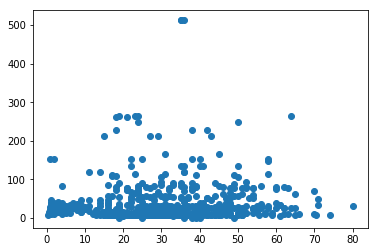

In [5]:
# now we want to see the relationship between the age and the fare
plt.scatter(data['Age'], data['Fare'])

In [6]:
# It's seems to be higher between the 30-40, however, it also coule be outlier.
# To simply out model, we just use part of the data
data_refine = data[
    (data['Age']>22) & (data['Fare']<400) & (data['Fare']>130)
]
data_refine.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0000,C23 C25 C27,S
118,119,0,1,"Baxter, Mr. Quigg Edmond",male,24.0,0,1,PC 17558,247.5208,B58 B60,C
195,196,1,1,"Lurette, Miss. Elise",female,58.0,0,0,PC 17569,146.5208,B80,C
268,269,1,1,"Graham, Mrs. William Thompson (Edith Junkins)",female,58.0,0,1,PC 17582,153.4625,C125,S
269,270,1,1,"Bissette, Miss. Amelia",female,35.0,0,0,PC 17760,135.6333,C99,S


In [7]:
Age = data_refine['Age']
Fare = data_refine['Fare']

### Query:  
How to know which model or which function is the best to predict a variable?

In [8]:
# guess is the predicted model for this problem.
# Here we just use the basic model, in actural situation, we need to choose the best model.
def func(age, k, b): return k * age + b

In [13]:
# define the loss function
def loss(y, yhat):
    return np.mean(np.abs(y-yhat))

In [24]:
# define a origin min_error_rate
min_error_rate = float('inf')

In [25]:
loss_value = []

In [26]:
# then we random choice the k and b to calculate the loss and then get the min k and b
# so
k_hat = random.random() * 20 - 10
b_hat = random.random() * 20 - 10

In [27]:
# Therefore
estimated_fares = func(Age, k_hat, b_hat)
# And
error = loss(y=Fare, yhat=estimated_fares)

loop == 10000
f(age) = -3.390898778189926 * age + -8.441245871505672, with error rate: 329.12027987248416
loop == 9998
f(age) = 3.036442573944118 * age + -4.684375840738994, with error rate: 78.9445541743357
loop == 9990
f(age) = 2.932974567395501 * age + 6.533988967138672, with error rate: 73.2736786533437
loop == 9988
f(age) = 4.2525188241329595 * age + -9.55024596182907, with error rate: 61.601324932727444
loop == 9923
f(age) = 4.241049503762003 * age + -1.8042978972498798, with error rate: 61.35945800275176
loop == 9897
f(age) = 4.195453207229402 * age + -1.7451714818307718, with error rate: 61.05064672169005
loop == 9883
f(age) = 3.817252148202691 * age + 7.231026410013676, with error rate: 59.63835119130898
loop == 9734
f(age) = 3.776219880597395 * age + 7.935823244377641, with error rate: 59.61278698134693
loop == 9559
f(age) = 3.6908060267992777 * age + 9.747283407912196, with error rate: 59.49696522247232
loop == 9096
f(age) = 3.8706191879626335 * age + 9.968361229728462, with

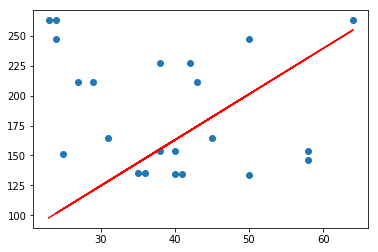

In [54]:
best_k = 0
best_b = 0
best_error = float('inf')
loop_times = 10000

while loop_times > 0:
    
    k_hat = random.random() * 20 - 10
    b_hat = random.random() * 20 - 10
    
    estimated_fares = func(Age, k_hat, b_hat)
    error = loss(y=Fare, yhat=estimated_fares)
    
    if error < best_error:
        best_k = k_hat
        best_b = b_hat
        best_error = error
    
        print('loop == {}'.format(loop_times))
        print('f(age) = {} * age + {}, with error rate: {}'.format(best_k, best_b, best_error))        
    
    loop_times -= 1
    
plt.scatter(Age, Fare)
plt.plot(Age, func(Age, best_k, best_b), c='r')
# plt.plot(Age, func(Age, k_hat, b_hat), c='r')
plt.show()

In [30]:
%matplotlib inline

### Supervised Direction to get optimal k and b

In [40]:
# if in a direction of k and b, the loss is getting smaller, we still use this losss or we random choice another loss
change_directions = [
    # (k, b)
    (+1, -1), # k increase, b decrease
    (+1, +1),
    (-1, +1),
    (-1, -1)  # k decrease, b decrease
]

In [44]:
# then we random choice a delta or the step
def step(): return random.random() * 1

In [45]:
# then
k_direction, b_direction = random.choice(change_directions)
k_direction

1

loop == 10000
f(age) = 7.235278975993048 * age + -5.891863850066676, with error rate: 117.20243964668093
loop == 9998
f(age) = 6.980929354392312 * age + -4.737330799170819, with error rate: 110.81444766027649
loop == 9997
f(age) = 6.099145879638469 * age + -4.311536804484191, with error rate: 87.03129880319227
loop == 9996
f(age) = 5.744438281649473 * age + -4.174526984917937, with error rate: 79.32592261791153
loop == 9995
f(age) = 4.978647958447202 * age + -3.922802754421241, with error rate: 66.35501117311969
loop == 9994
f(age) = 4.44631115022721 * age + -3.7112049338062887, with error rate: 62.74963915381156
loop == 9993
f(age) = 3.9878840533137745 * age + -3.011065277580194, with error rate: 61.0739699171847
loop == 9978
f(age) = 4.186549510568362 * age + -2.64615579174892, with error rate: 60.99034441248575
loop == 9977
f(age) = 4.1108568079487595 * age + -3.319712733437091, with error rate: 60.822655749843946
loop == 9214
f(age) = 3.2881081933997867 * age + 18.721723031742332, 

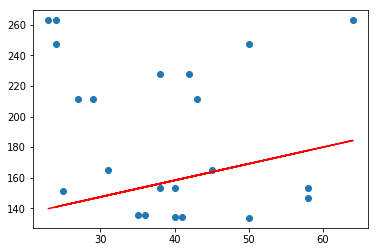

In [55]:
k_hat = random.random() * 20 - 10
b_hat = random.random() * 20 - 10
best_error = float('inf')
loop_times = 10000

k_direction, b_direction = random.choice(change_directions)

while loop_times > 0:
    
    delta_k = k_direction * step()
    delta_b = b_direction * step()
    
    k_hat += delta_k
    b_hat += delta_b
    
    estimated_fares = func(Age, k_hat, b_hat)
    error = loss(y=Fare, yhat=estimated_fares)
    
    if error < best_error:
        best_k = k_hat
        best_b = b_hat
        best_error = error
    
        print('loop == {}'.format(loop_times))
        print('f(age) = {} * age + {}, with error rate: {}'.format(best_k, best_b, best_error))
    else:
        k_direction, b_direction = random.choice(change_directions)

    loop_times -= 1
    
plt.scatter(Age, Fare)
plt.plot(Age, func(Age, best_k, best_b), c='r')
# plt.plot(Age, func(Age, k_hat, b_hat), c='r')
plt.show()

This model still has problem that the learning rate change every time when the direction change and the descend rate is not the best. Acturally, the descend rate is random. So, we want the descend rate is always the best.

### Gradient Descent to get optimal k and b

In [56]:
def derivate_k(y, yhat, x):
    abs_values = [1 if (y_i - yhat_i) > 0 else -1 for y_i, yhat_i in zip(y, yhat)]

    return np.mean([a * -x_i for a, x_i in zip(abs_values, x)])


def derivate_b(y, yhat):
    abs_values = [1 if (y_i - yhat_i) > 0 else -1 for y_i, yhat_i in zip(y, yhat)]
    return np.mean([a * -1 for a in abs_values])

In [57]:
learing_rate = 1e-1

In [58]:
losses = []

In [62]:
k_hat = random.random() * 20 - 10
b_hat = random.random() * 20 - 10
best_error = float('inf')
loop_times = 10000

while loop_times > 0:

    k_delta = -1 * learing_rate * derivate_k(Fare, func(Age, k_hat, b_hat), Age)
    b_delta = -1 * learing_rate * derivate_b(Fare, func(Age, k_hat, b_hat))

    k_hat += k_delta
    b_hat += b_delta

    estimated_fares = func(Age, k_hat, b_hat)
    error = loss(y=Fare, yhat=estimated_fares)

    print('loop == {}'.format(loop_times))
    print('f(age) = {} * age + {}, with error rate: {}'.format(k_hat, b_hat, error))

    losses.append(error)

    loop_times -= 1

loop == 10000
f(age) = -2.8967314613948303 * age + -5.982669835557752, with error rate: 307.3217920292373
loop == 9999
f(age) = 1.0169049022415333 * age + -5.882669835557753, with error rate: 154.05629616146862
loop == 9998
f(age) = 4.930541265877897 * age + -5.782669835557753, with error rate: 66.02919766435487
loop == 9997
f(age) = 4.25326853860517 * age + -5.782669835557753, with error rate: 61.44221419328046
loop == 9996
f(age) = 3.5759958113324424 * age + -5.782669835557753, with error rate: 67.59590342125847
loop == 9995
f(age) = 5.244177629514261 * age + -5.728124381012298, with error rate: 69.73464128923764
loop == 9994
f(age) = 3.7214503567869883 * age + -5.746306199194117, with error rate: 65.14962242952295
loop == 9993
f(age) = 5.389632174968806 * age + -5.691760744648662, with error rate: 71.95612889254343
loop == 9992
f(age) = 3.866904902241534 * age + -5.709942562830481, with error rate: 63.01553035033637
loop == 9991
f(age) = 5.125995811332443 * age + -5.664488017375935,

loop == 9859
f(age) = 4.289632174968844 * age + -3.564488017375939, with error rate: 61.68849518501627
loop == 9858
f(age) = 3.6123594476961167 * age + -3.564488017375939, with error rate: 65.77937449563804
loop == 9857
f(age) = 5.280541265877935 * age + -3.509942562830484, with error rate: 70.69166608262664
loop == 9856
f(age) = 3.7578139931506627 * age + -3.528124381012302, with error rate: 63.39734853215407
loop == 9855
f(age) = 5.016904902241572 * age + -3.4826698355577568, with error rate: 66.69654601616611
loop == 9854
f(age) = 3.948723084059754 * age + -3.491760744648666, with error rate: 61.34288540729194
loop == 9853
f(age) = 4.516904902241572 * age + -3.4644880173759387, with error rate: 63.22775138336339
loop == 9852
f(age) = 3.839632174968845 * age + -3.4644880173759387, with error rate: 62.338257623063164
loop == 9851
f(age) = 5.098723084059754 * age + -3.4190334719213933, with error rate: 67.93959996692419
loop == 9850
f(age) = 3.575995811332482 * age + -3.437215290103211

loop == 9708
f(age) = 3.666904902241609 * age + -1.2008516537395717, with error rate: 63.58020094191838
loop == 9707
f(age) = 5.335086720423428 * age + -1.1463061991941172, with error rate: 71.95199666113965
loop == 9706
f(age) = 3.8123594476961555 * age + -1.1644880173759353, with error rate: 61.676841698240715
loop == 9705
f(age) = 4.744177629514337 * age + -1.128124381012299, with error rate: 64.76700758171074
loop == 9704
f(age) = 4.06690490224161 * age + -1.128124381012299, with error rate: 60.534064904580035
loop == 9703
f(age) = 4.31690490224161 * age + -1.1099425628304809, with error rate: 61.873205928818194
loop == 9702
f(age) = 3.639632174968883 * age + -1.1099425628304809, with error rate: 63.9855728427448
loop == 9701
f(age) = 5.307813993150702 * age + -1.0553971082850264, with error rate: 71.55323633056115
loop == 9700
f(age) = 3.785086720423429 * age + -1.0735789264668445, with error rate: 61.93825762306267
loop == 9699
f(age) = 5.044177629514339 * age + -1.02812438101229

loop == 9558
f(age) = 5.303268538605277 * age + 1.190057437169519, with error rate: 71.95816611133237
loop == 9557
f(age) = 3.4987230840598222 * age + 1.1627847098967916, with error rate: 65.09652325596743
loop == 9556
f(age) = 5.16690490224164 * age + 1.217330164442246, with error rate: 69.82079831403266
loop == 9555
f(age) = 3.6441776295143677 * age + 1.199148346260428, with error rate: 62.67937332554163
loop == 9554
f(age) = 4.903268538605277 * age + 1.2446028917149734, with error rate: 65.91245510707591
loop == 9553
f(age) = 3.835086720423458 * age + 1.2355119826240644, with error rate: 60.69929036596925
loop == 9552
f(age) = 4.403268538605277 * age + 1.2627847098967917, with error rate: 62.45812328419029
loop == 9551
f(age) = 3.7259958113325493 * age + 1.2627847098967917, with error rate: 61.62028241645071
loop == 9550
f(age) = 4.985086720423459 * age + 1.3082392553513371, with error rate: 67.06873219833018
loop == 9549
f(age) = 3.462359447696186 * age + 1.290057437169519, with er

loop == 9391
f(age) = 3.6532685386053014 * age + 3.7809665280786153, with error rate: 61.391356796615696
loop == 9390
f(age) = 4.912359447696211 * age + 3.8264210735331607, with error rate: 66.41914542147107
loop == 9389
f(age) = 3.3896321749689386 * age + 3.8082392553513427, with error rate: 65.47338276009924
loop == 9388
f(age) = 5.0578139931507575 * age + 3.8627847098967973, with error rate: 68.64063302477688
loop == 9387
f(age) = 3.535086720423485 * age + 3.8446028917149793, with error rate: 63.0271017683637
loop == 9386
f(age) = 5.203268538605304 * age + 3.899148346260434, with error rate: 70.89246363199402
loop == 9385
f(age) = 3.3987230840598492 * age + 3.8718756189877066, with error rate: 65.28701912373559
loop == 9384
f(age) = 5.066904902241667 * age + 3.9264210735331613, with error rate: 68.79063302477688
loop == 9383
f(age) = 3.5441776295143947 * age + 3.908239255351343, with error rate: 62.84073813200006
loop == 9382
f(age) = 5.212359447696214 * age + 3.962784709896798, wit

loop == 9178
f(age) = 3.5032685386053215 * age + 7.062784709896799, with error rate: 61.8025149915039
loop == 9177
f(age) = 5.17145035678714 * age + 7.1173301644422535, with error rate: 71.19597602868858
loop == 9176
f(age) = 3.3669049022416857 * age + 7.090057437169526, with error rate: 64.06243234687577
loop == 9175
f(age) = 5.035086720423504 * age + 7.144602891714981, with error rate: 68.8912528594879
loop == 9174
f(age) = 3.512359447696231 * age + 7.126421073533162, with error rate: 61.64486919330965
loop == 9173
f(age) = 4.77145035678714 * age + 7.171875618987708, with error rate: 65.04324023104333
loop == 9172
f(age) = 3.7032685386053217 * age + 7.162784709896799, with error rate: 59.93571779714183
loop == 9171
f(age) = 3.9532685386053217 * age + 7.180966528078618, with error rate: 59.6658366479343
loop == 9170
f(age) = 3.857813993150776 * age + 7.190057437169527, with error rate: 59.57389449917394
loop == 9169
f(age) = 3.7623594476962303 * age + 7.1991483462604355, with error ra

loop == 9055
f(age) = 4.725995811332597 * age + 8.953693800805896, with error rate: 64.7196865120351
loop == 9054
f(age) = 3.6578139931507785 * age + 8.944602891714986, with error rate: 59.725387218629415
loop == 9053
f(age) = 3.9078139931507785 * age + 8.962784709896804, with error rate: 59.46046474710786
loop == 9052
f(age) = 3.812359447696233 * age + 8.971875618987713, with error rate: 59.36852259834754
loop == 9051
f(age) = 3.716904902241687 * age + 8.980966528078623, with error rate: 59.57104837565419
loop == 9050
f(age) = 3.966904902241687 * age + 8.99914834626044, with error rate: 59.51356392066156
loop == 9049
f(age) = 3.8714503567871414 * age + 9.00823925535135, with error rate: 59.42162177190125
loop == 9048
f(age) = 3.7759958113325958 * age + 9.01733016444226, with error rate: 59.41670953267901
loop == 9047
f(age) = 4.025995811332596 * age + 9.035511982624078, with error rate: 59.902957994934404
loop == 9046
f(age) = 3.3487230840598685 * age + 9.035511982624078, with error r

loop == 8892
f(age) = 3.312359447696246 * age + 11.335511982624094, with error rate: 62.65664722290856
loop == 8891
f(age) = 4.980541265878065 * age + 11.390057437169549, with error rate: 68.91622396257316
loop == 8890
f(age) = 3.1759958113326103 * age + 11.362784709896822, with error rate: 64.91656457828044
loop == 8889
f(age) = 4.844177629514428 * age + 11.417330164442276, with error rate: 66.76108757023195
loop == 8888
f(age) = 3.321450356787156 * age + 11.399148346260459, with error rate: 62.47028358654492
loop == 8887
f(age) = 4.989632174968975 * age + 11.453693800805913, with error rate: 69.09762892125082
loop == 8886
f(age) = 3.18508672042352 * age + 11.426421073533186, with error rate: 64.7302009419168
loop == 8885
f(age) = 4.853268538605338 * age + 11.48096652807864, with error rate: 66.91108757023194
loop == 8884
f(age) = 3.3305412658780655 * age + 11.462784709896823, with error rate: 62.283919950181286
loop == 8883
f(age) = 4.998723084059884 * age + 11.517330164442278, with 

loop == 8760
f(age) = 3.3305412658780815 * age + 13.39914834626048, with error rate: 61.22772160307357
loop == 8759
f(age) = 4.9987230840599 * age + 13.453693800805935, with error rate: 69.80713305348253
loop == 8758
f(age) = 3.1941776295144457 * age + 13.426421073533207, with error rate: 63.487638958445466
loop == 8757
f(age) = 4.862359447696264 * age + 13.480966528078662, with error rate: 67.41315368593469
loop == 8756
f(age) = 3.3396321749689912 * age + 13.462784709896845, with error rate: 61.041357966709896
loop == 8755
f(age) = 5.00781399315081 * age + 13.5173301644423, with error rate: 69.98853801216022
loop == 8754
f(age) = 3.2032685386053554 * age + 13.490057437169572, with error rate: 63.30127532208181
loop == 8753
f(age) = 4.871450356787173 * age + 13.544602891715027, with error rate: 67.5631536859347
loop == 8752
f(age) = 3.348723084059901 * age + 13.526421073533209, with error rate: 60.854994330346244
loop == 8751
f(age) = 5.01690490224172 * age + 13.580966528078664, with e

loop == 8628
f(age) = 3.0669049022417365 * age + 15.480966528078685, with error rate: 64.49011829728812
loop == 8627
f(age) = 4.7350867204235545 * age + 15.53551198262414, with error rate: 65.84869087601761
loop == 8626
f(age) = 3.212359447696282 * age + 15.517330164442322, with error rate: 62.04383730555257
loop == 8625
f(age) = 4.880541265878101 * age + 15.571875618987777, with error rate: 68.25217437579694
loop == 8624
f(age) = 3.075995811332646 * age + 15.54460289171505, with error rate: 64.30375466092447
loop == 8623
f(age) = 4.744177629514464 * age + 15.599148346260504, with error rate: 65.99869087601762
loop == 8622
f(age) = 3.2214503567871917 * age + 15.580966528078687, with error rate: 61.8574736691889
loop == 8621
f(age) = 4.889632174969011 * age + 15.635511982624141, with error rate: 68.43357933447463
loop == 8620
f(age) = 3.085086720423556 * age + 15.608239255351414, with error rate: 64.11739102456082
loop == 8619
f(age) = 4.753268538605374 * age + 15.662784709896869, with 

loop == 8452
f(age) = 3.1850867204235795 * age + 18.271875618987746, with error rate: 60.99631664439516
loop == 8451
f(age) = 4.853268538605398 * age + 18.3264210735332, with error rate: 68.51126528488828
loop == 8450
f(age) = 3.0487230840599437 * age + 18.299148346260473, with error rate: 63.256233999767055
loop == 8449
f(age) = 4.716904902241762 * age + 18.353693800805928, with error rate: 66.08422806610064
loop == 8448
f(age) = 3.1941776295144892 * age + 18.33551198262411, with error rate: 60.8099530080315
loop == 8447
f(age) = 4.862359447696308 * age + 18.390057437169563, with error rate: 68.69267024356598
loop == 8446
f(age) = 3.0578139931508534 * age + 18.362784709896836, with error rate: 63.06987036340342
loop == 8445
f(age) = 4.725995811332671 * age + 18.41733016444229, with error rate: 66.23936445844201
loop == 8444
f(age) = 2.9214503567872168 * age + 18.390057437169563, with error rate: 65.32978771877532
loop == 8443
f(age) = 4.589632174969035 * age + 18.444602891715018, with

loop == 8269
f(age) = 3.4987230840599306 * age + 20.653693800805854, with error rate: 58.00715896198396
loop == 8268
f(age) = 3.403268538605385 * age + 20.662784709896762, with error rate: 58.23117234259622
loop == 8267
f(age) = 3.653268538605385 * age + 20.68096652807858, with error rate: 58.152200284298004
loop == 8266
f(age) = 3.5578139931508392 * age + 20.69005743716949, with error rate: 58.06025813553767
loop == 8265
f(age) = 3.4623594476962936 * age + 20.699148346260397, with error rate: 58.07683349962101
loop == 8264
f(age) = 3.7123594476962936 * age + 20.717330164442217, with error rate: 58.2052994578517
loop == 8263
f(age) = 3.616904902241748 * age + 20.726421073533125, with error rate: 58.11335730909138
loop == 8262
f(age) = 3.521450356787202 * age + 20.735511982624033, with error rate: 58.021415160331074
loop == 8261
f(age) = 3.4259958113326565 * age + 20.74460289171494, with error rate: 58.15947812772018
loop == 8260
f(age) = 3.6759958113326565 * age + 20.76278470989676, wi

f(age) = 3.689632174968997 * age + 22.399148346260326, with error rate: 58.0307126809922
loop == 8118
f(age) = 3.5941776295144514 * age + 22.408239255351234, with error rate: 57.93877053223185
loop == 8117
f(age) = 3.4987230840599057 * age + 22.41733016444214, with error rate: 57.846828383471525
loop == 8116
f(age) = 3.40326853860536 * age + 22.42642107353305, with error rate: 57.9105111855715
loop == 8115
f(age) = 3.65326853860536 * age + 22.44460289171487, with error rate: 57.991869705785575
loop == 8114
f(age) = 3.5578139931508144 * age + 22.453693800805777, with error rate: 57.899927557025244
loop == 8113
f(age) = 3.4623594476962687 * age + 22.462784709896685, with error rate: 57.807985408264905
loop == 8112
f(age) = 3.366904902241723 * age + 22.471875618987593, with error rate: 57.99315581367066
loop == 8111
f(age) = 3.616904902241723 * age + 22.490057437169412, with error rate: 57.95302673057897
loop == 8110
f(age) = 3.5214503567871773 * age + 22.49914834626032, with error rate: 

loop == 7924
f(age) = 3.3850867204235104 * age + 24.65369380080568, with error rate: 57.55100705334019
loop == 7923
f(age) = 3.6350867204235104 * age + 24.6718756189875, with error rate: 57.772034995041764
loop == 7922
f(age) = 3.5396321749689648 * age + 24.680966528078407, with error rate: 57.68009284628144
loop == 7921
f(age) = 3.444177629514419 * age + 24.690057437169315, with error rate: 57.588150697521094
loop == 7920
f(age) = 3.3487230840598734 * age + 24.699148346260223, with error rate: 57.633651681439375
loop == 7919
f(age) = 3.5987230840598734 * age + 24.717330164442043, with error rate: 57.73319201983514
loop == 7918
f(age) = 3.5032685386053277 * age + 24.72642107353295, with error rate: 57.64124987107481
loop == 7917
f(age) = 3.407813993150782 * age + 24.73551198262386, with error rate: 57.5493077223145
loop == 7916
f(age) = 3.3123594476962364 * age + 24.744602891714766, with error rate: 57.716296309538535
loop == 7915
f(age) = 3.5623594476962364 * age + 24.762784709896586,

loop == 7725
f(age) = 3.3896321749689324 * age + 26.96278470989649, with error rate: 57.32947301157066
loop == 7724
f(age) = 3.2941776295143868 * age + 26.971875618987397, with error rate: 57.35679217730724
loop == 7723
f(age) = 3.5441776295143868 * age + 26.990057437169217, with error rate: 57.47451433388474
loop == 7722
f(age) = 3.448723084059841 * age + 26.999148346260124, with error rate: 57.382572185124374
loop == 7721
f(age) = 3.3532685386052954 * age + 27.008239255351032, with error rate: 57.29063003636404
loop == 7720
f(age) = 3.2578139931507497 * age + 27.01733016444194, with error rate: 57.439436805406416
loop == 7719
f(age) = 3.5078139931507497 * age + 27.03551198262376, with error rate: 57.43567135867811
loop == 7718
f(age) = 3.412359447696204 * age + 27.044602891714668, with error rate: 57.34372920991777
loop == 7717
f(age) = 3.3169049022416583 * age + 27.053693800805576, with error rate: 57.28509796243122
loop == 7716
f(age) = 3.5669049022416583 * age + 27.071875618987395

loop == 7572
f(age) = 3.294177629514362 * age + 28.735511982623684, with error rate: 57.077200284297916
loop == 7571
f(age) = 3.198723084059816 * age + 28.744602891714592, with error rate: 57.27311449135689
loop == 7570
f(age) = 3.448723084059816 * age + 28.762784709896412, with error rate: 57.222241606611966
loop == 7569
f(age) = 3.3532685386052705 * age + 28.77187561898732, with error rate: 57.13029945785163
loop == 7568
f(age) = 3.257813993150725 * age + 28.780966528078228, with error rate: 57.11877564838169
loop == 7567
f(age) = 3.507813993150725 * age + 28.799148346260047, with error rate: 57.27534078016569
loop == 7566
f(age) = 3.412359447696179 * age + 28.808239255350955, with error rate: 57.18339863140536
loop == 7565
f(age) = 3.3169049022416335 * age + 28.817330164441863, with error rate: 57.09145648264501
loop == 7564
f(age) = 3.221450356787088 * age + 28.82642107353277, with error rate: 57.201420276480874
loop == 7563
f(age) = 3.471450356787088 * age + 28.84460289171459, wit

loop == 7440
f(age) = 3.4759958113325222 * age + 30.271875618987256, with error rate: 57.111084581818574
loop == 7439
f(age) = 3.3805412658779765 * age + 30.280966528078164, with error rate: 57.019142433058235
loop == 7438
f(age) = 3.285086720423431 * age + 30.29005743716907, with error rate: 56.927200284297896
loop == 7437
f(age) = 3.189632174968885 * age + 30.29914834625998, with error rate: 57.013197135985074
loop == 7436
f(age) = 3.439632174968885 * age + 30.3173301644418, with error rate: 57.07224160661196
loop == 7435
f(age) = 3.3441776295143395 * age + 30.326421073532707, with error rate: 56.98029945785163
loop == 7434
f(age) = 3.248723084059794 * age + 30.335511982623615, with error rate: 56.88835730909131
loop == 7433
f(age) = 3.153268538605248 * age + 30.344602891714523, with error rate: 57.095841764084234
loop == 7432
f(age) = 3.403268538605248 * age + 30.362784709896342, with error rate: 57.03339863140534
loop == 7431
f(age) = 3.3078139931507025 * age + 30.37187561898725, w

loop == 7308
f(age) = 3.312359447696137 * age + 31.799148346259916, with error rate: 56.816043259504504
loop == 7307
f(age) = 3.216904902241591 * age + 31.808239255350824, with error rate: 56.72410111074418
loop == 7306
f(age) = 3.1214503567870455 * age + 31.81733016444173, with error rate: 56.907618623588434
loop == 7305
f(age) = 3.3714503567870455 * age + 31.83551198262355, with error rate: 56.86914243305823
loop == 7304
f(age) = 3.2759958113325 * age + 31.84460289171446, with error rate: 56.77720028429789
loop == 7303
f(age) = 3.180541265877954 * age + 31.853693800805367, with error rate: 56.75327978061321
loop == 7302
f(age) = 3.430541265877954 * age + 31.871875618987186, with error rate: 56.92224160661193
loop == 7301
f(age) = 3.3350867204234085 * age + 31.880966528078094, with error rate: 56.83029945785161
loop == 7300
f(age) = 3.239632174968863 * age + 31.890057437169002, with error rate: 56.73835730909127
loop == 7299
f(age) = 3.144177629514317 * age + 31.89914834625991, with e

loop == 7149
f(age) = 3.3350867204233836 * age + 33.64460289171424, with error rate: 56.669968879339216
loop == 7148
f(age) = 3.239632174968838 * age + 33.65369380080515, with error rate: 56.578026730578884
loop == 7147
f(age) = 3.1441776295142922 * age + 33.66278470989606, with error rate: 56.51526325168772
loop == 7146
f(age) = 3.3941776295142922 * age + 33.680966528077875, with error rate: 56.72306805289293
loop == 7145
f(age) = 3.2987230840597466 * age + 33.69005743716878, with error rate: 56.63112590413259
loop == 7144
f(age) = 3.203268538605201 * age + 33.69914834625969, with error rate: 56.53918375537227
loop == 7143
f(age) = 3.107813993150655 * age + 33.7082392553506, with error rate: 56.59790787978691
loop == 7142
f(age) = 3.357813993150655 * age + 33.726421073532414, with error rate: 56.68422507768633
loop == 7141
f(age) = 3.2623594476961095 * age + 33.73551198262332, with error rate: 56.592282928926004
loop == 7140
f(age) = 3.166904902241564 * age + 33.74460289171423, with e

loop == 6966
f(age) = 3.139632174968808 * age + 35.76278470989579, with error rate: 56.29083664793425
loop == 6965
f(age) = 3.0441776295142624 * age + 35.7718756189867, with error rate: 56.38179217730769
loop == 6964
f(age) = 3.2941776295142624 * age + 35.790057437168514, with error rate: 56.4358779702483
loop == 6963
f(age) = 3.1987230840597167 * age + 35.79914834625942, with error rate: 56.343935821487975
loop == 6962
f(age) = 3.103268538605171 * age + 35.80823925535033, with error rate: 56.25199367272764
loop == 6961
f(age) = 3.0078139931506254 * age + 35.81733016444124, with error rate: 56.46443680540685
loop == 6960
f(age) = 3.2578139931506254 * age + 35.83551198262305, with error rate: 56.397034995041686
loop == 6959
f(age) = 3.1623594476960797 * age + 35.84460289171396, with error rate: 56.30509284628136
loop == 6958
f(age) = 3.066904902241534 * age + 35.85369380080487, with error rate: 56.310097962431655
loop == 6957
f(age) = 3.316904902241534 * age + 35.871875618986685, with e

f(age) = 3.025995811332413 * age + 37.99914834625914, with error rate: 56.02228804507639
loop == 6772
f(age) = 3.275995811332413 * age + 38.017330164440956, with error rate: 56.21604325950448
loop == 6771
f(age) = 3.180541265877867 * age + 38.026421073531864, with error rate: 56.124101110744164
loop == 6770
f(age) = 3.0850867204233214 * age + 38.03551198262277, with error rate: 56.03215896198383
loop == 6769
f(age) = 2.9896321749687758 * age + 38.04460289171368, with error rate: 56.10493267317558
loop == 6768
f(age) = 3.2396321749687758 * age + 38.062784709895496, with error rate: 56.17720028429789
loop == 6767
f(age) = 3.14417762951423 * age + 38.071875618986404, with error rate: 56.085258135537536
loop == 6766
f(age) = 3.0487230840596844 * age + 38.08096652807731, with error rate: 55.993315986777205
loop == 6765
f(age) = 2.9532685386051387 * age + 38.09005743716822, with error rate: 56.18757730127474
loop == 6764
f(age) = 3.2032685386051387 * age + 38.108239255350036, with error rate

f(age) = 2.99417762951421 * age + 39.471875618986225, with error rate: 55.83406490458061
loop == 6645
f(age) = 3.24417762951421 * age + 39.49005743716804, with error rate: 56.05178706115739
loop == 6644
f(age) = 3.1487230840596645 * age + 39.49914834625895, with error rate: 55.95984491239705
loop == 6643
f(age) = 3.053268538605119 * age + 39.50823925534986, with error rate: 55.867902763636714
loop == 6642
f(age) = 2.957813993150573 * age + 39.517330164440764, with error rate: 55.9167095326798
loop == 6641
f(age) = 3.207813993150573 * age + 39.53551198262258, with error rate: 56.01294408595077
loop == 6640
f(age) = 3.1123594476960275 * age + 39.54460289171349, with error rate: 55.92100193719045
loop == 6639
f(age) = 3.016904902241482 * age + 39.553693800804396, with error rate: 55.8290597884301
loop == 6638
f(age) = 2.921450356786936 * age + 39.562784709895304, with error rate: 55.999354160778964
loop == 6637
f(age) = 3.171450356786936 * age + 39.58096652807712, with error rate: 55.9741

loop == 6506
f(age) = 3.1032685386050964 * age + 41.099148346258744, with error rate: 55.77100193719043
loop == 6505
f(age) = 3.0078139931505508 * age + 41.10823925534965, with error rate: 55.6790597884301
loop == 6504
f(age) = 2.912359447696005 * age + 41.11733016444056, with error rate: 55.73943680540717
loop == 6503
f(age) = 3.162359447696005 * age + 41.135511982622376, with error rate: 55.82410111074416
loop == 6502
f(age) = 3.0669049022414594 * age + 41.144602891713284, with error rate: 55.732158961983835
loop == 6501
f(age) = 2.9714503567869137 * age + 41.15369380080419, with error rate: 55.640216813223496
loop == 6500
f(age) = 2.875995811332368 * age + 41.1627847098951, with error rate: 55.822081433506334
loop == 6499
f(age) = 3.125995811332368 * age + 41.180966528076915, with error rate: 55.78525813553754
loop == 6498
f(age) = 3.0305412658778224 * age + 41.19005743716782, with error rate: 55.69331598677721
loop == 6497
f(age) = 2.9350867204232767 * age + 41.19914834625873, with

loop == 6284
f(age) = 2.985086720423242 * age + 43.67187561898569, with error rate: 55.42430772231439
loop == 6283
f(age) = 2.889632174968696 * age + 43.680966528076596, with error rate: 55.332365573554064
loop == 6282
f(age) = 2.7941776295141505 * age + 43.6900574371675, with error rate: 55.56712275582054
loop == 6281
f(age) = 3.0441776295141505 * age + 43.70823925534932, with error rate: 55.47740689586813
loop == 6280
f(age) = 2.948723084059605 * age + 43.71733016444023, with error rate: 55.3854647471078
loop == 6279
f(age) = 2.853268538605059 * age + 43.726421073531135, with error rate: 55.41278391284534
loop == 6278
f(age) = 3.103268538605059 * age + 43.74460289171295, with error rate: 55.53050606942186
loop == 6277
f(age) = 3.0078139931505135 * age + 43.75369380080386, with error rate: 55.438563920661515
loop == 6276
f(age) = 2.9123594476959678 * age + 43.76278470989477, with error rate: 55.346621771901184
loop == 6275
f(age) = 2.816904902241422 * age + 43.771875618985675, with er

loop == 6146
f(age) = 2.939632174968674 * age + 45.27187561898548, with error rate: 55.235464747107784
loop == 6145
f(age) = 2.844177629514128 * age + 45.28096652807639, with error rate: 55.152866557473516
loop == 6144
f(age) = 3.094177629514128 * age + 45.29914834625821, with error rate: 55.380506069421834
loop == 6143
f(age) = 2.9987230840595824 * age + 45.308239255349115, with error rate: 55.288563920661495
loop == 6142
f(age) = 2.9032685386050368 * age + 45.31733016444002, with error rate: 55.196621771901164
loop == 6141
f(age) = 2.807813993150491 * age + 45.32642107353093, with error rate: 55.23551118557268
loop == 6140
f(age) = 3.057813993150491 * age + 45.344602891712746, with error rate: 55.34166309421523
loop == 6139
f(age) = 2.9623594476959454 * age + 45.353693800803654, with error rate: 55.24972094545489
loop == 6138
f(age) = 2.8669049022413997 * age + 45.36278470989456, with error rate: 55.15777879669456
loop == 6137
f(age) = 2.771450356786854 * age + 45.37187561898547, wit

loop == 5967
f(age) = 2.7805412658777353 * age + 47.34460289171249, with error rate: 54.9367508549943
loop == 5966
f(age) = 3.0305412658777353 * age + 47.362784709894306, with error rate: 55.13215896198381
loop == 5965
f(age) = 2.9350867204231896 * age + 47.371875618985214, with error rate: 55.04021681322349
loop == 5964
f(age) = 2.839632174968644 * age + 47.38096652807612, with error rate: 54.948274664463156
loop == 5963
f(age) = 2.7441776295140983 * age + 47.39005743716703, with error rate: 55.01939548309347
loop == 5962
f(age) = 2.9941776295140983 * age + 47.408239255348846, with error rate: 55.0933159867772
loop == 5961
f(age) = 2.8987230840595526 * age + 47.417330164439754, with error rate: 55.00137383801687
loop == 5960
f(age) = 2.803268538605007 * age + 47.42642107353066, with error rate: 54.909431689256515
loop == 5959
f(age) = 2.7078139931504612 * age + 47.43551198262157, with error rate: 55.10204011119268
loop == 5958
f(age) = 2.9578139931504612 * age + 47.453693800803386, wi

loop == 5689
f(age) = 2.8441776295140535 * age + 50.571875618984805, with error rate: 54.66253086281026
loop == 5688
f(age) = 2.748723084059508 * age + 50.58096652807571, with error rate: 54.570588714049926
loop == 5687
f(age) = 2.653268538604962 * age + 50.59005743716662, with error rate: 54.664850028548216
loop == 5686
f(age) = 2.903268538604962 * age + 50.60823925534844, with error rate: 54.71563003636399
loop == 5685
f(age) = 2.8078139931504165 * age + 50.617330164439345, with error rate: 54.62368788760364
loop == 5684
f(age) = 2.712359447695871 * age + 50.62642107353025, with error rate: 54.53174573884333
loop == 5683
f(age) = 2.616904902241325 * age + 50.63551198262116, with error rate: 54.74749465664738
loop == 5682
f(age) = 2.866904902241325 * age + 50.65369380080298, with error rate: 54.67678706115737
loop == 5681
f(age) = 2.7714503567867794 * age + 50.662784709893884, with error rate: 54.58484491239702
loop == 5680
f(age) = 2.6759958113322337 * age + 50.67187561898479, with e

loop == 5410
f(age) = 2.812359447695826 * age + 53.80823925534803, with error rate: 54.337944085950724
loop == 5409
f(age) = 2.7169049022412803 * age + 53.817330164438935, with error rate: 54.246001937190414
loop == 5408
f(age) = 2.6214503567867347 * age + 53.82642107352984, with error rate: 54.155965731027734
loop == 5407
f(age) = 2.8714503567867347 * age + 53.84460289171166, with error rate: 54.39104325950446
loop == 5406
f(age) = 2.775995811332189 * age + 53.85369380080257, with error rate: 54.29910111074412
loop == 5405
f(age) = 2.6805412658776433 * age + 53.862784709893475, with error rate: 54.2071589619838
loop == 5404
f(age) = 2.5850867204230976 * age + 53.87187561898438, with error rate: 54.238610359126916
loop == 5403
f(age) = 2.8350867204230976 * age + 53.8900574371662, with error rate: 54.35220028429785
loop == 5402
f(age) = 2.739632174968552 * age + 53.89914834625711, with error rate: 54.2602581355375
loop == 5401
f(age) = 2.6441776295140063 * age + 53.908239255348015, with

loop == 5182
f(age) = 2.466904902241243 * age + 56.44460289171133, with error rate: 54.066296309540284
loop == 5181
f(age) = 2.716904902241243 * age + 56.46278470989314, with error rate: 54.00550606942181
loop == 5180
f(age) = 2.6214503567866974 * age + 56.47187561898405, with error rate: 53.913563920661495
loop == 5179
f(age) = 2.5259958113321517 * age + 56.48096652807496, with error rate: 53.911957466565084
loop == 5178
f(age) = 2.7759958113321517 * age + 56.499148346256774, with error rate: 54.05860524297554
loop == 5177
f(age) = 2.680541265877606 * age + 56.50823925534768, with error rate: 53.966663094215214
loop == 5176
f(age) = 2.5850867204230603 * age + 56.51733016443859, with error rate: 53.874720945454875
loop == 5175
f(age) = 2.4896321749685146 * age + 56.5264210735295, with error rate: 53.99460209466426
loop == 5174
f(age) = 2.7396321749685146 * age + 56.544602891711314, with error rate: 54.019762267768925
loop == 5173
f(age) = 2.644177629513969 * age + 56.55369380080222, wi

loop == 4924
f(age) = 2.7123594476957464 * age + 59.44460289171094, with error rate: 53.73009284628131
loop == 4923
f(age) = 2.6169049022412008 * age + 59.45369380080185, with error rate: 53.63815069752097
loop == 4922
f(age) = 2.521450356786655 * age + 59.46278470989276, with error rate: 53.54620854876065
loop == 4921
f(age) = 2.4259958113321094 * age + 59.47187561898367, with error rate: 53.61815581367271
loop == 4920
f(age) = 2.6759958113321094 * age + 59.49005743716548, with error rate: 53.6912498710747
loop == 4919
f(age) = 2.5805412658775637 * age + 59.49914834625639, with error rate: 53.59930772231437
loop == 4918
f(age) = 2.485086720423018 * age + 59.5082392553473, with error rate: 53.50736557355404
loop == 4917
f(age) = 2.3896321749684724 * age + 59.51733016443821, with error rate: 53.70080044177188
loop == 4916
f(age) = 2.6396321749684724 * age + 59.53551198262002, with error rate: 53.65240689586808
loop == 4915
f(age) = 2.5441776295139267 * age + 59.54460289171093, with erro

f(age) = 2.6214503567866103 * age + 62.644602891710534, with error rate: 53.352406895868086
loop == 4647
f(age) = 2.5259958113320646 * age + 62.65369380080144, with error rate: 53.26046474710774
loop == 4646
f(age) = 2.430541265877519 * age + 62.66278470989235, with error rate: 53.16852259834743
loop == 4645
f(age) = 2.3350867204229733 * age + 62.67187561898326, with error rate: 53.26361035912743
loop == 4644
f(age) = 2.5850867204229733 * age + 62.69005743716507, with error rate: 53.31356392066147
loop == 4643
f(age) = 2.4896321749684276 * age + 62.69914834625598, with error rate: 53.22162177190114
loop == 4642
f(age) = 2.394177629513882 * age + 62.70823925534689, with error rate: 53.1296796231408
loop == 4641
f(age) = 2.2987230840593362 * age + 62.7173301644378, with error rate: 53.346254987226615
loop == 4640
f(age) = 2.5487230840593362 * age + 62.73551198261961, with error rate: 53.27472094545485
loop == 4639
f(age) = 2.4532685386047905 * age + 62.74460289171052, with error rate: 53

loop == 4449
f(age) = 2.2805412658774866 * age + 64.94460289171066, with error rate: 52.98675085499528
loop == 4448
f(age) = 2.5305412658774866 * age + 64.96278470989247, with error rate: 53.054886234711006
loop == 4447
f(age) = 2.435086720422941 * age + 64.97187561898339, with error rate: 52.962944085950674
loop == 4446
f(age) = 2.3396321749683953 * age + 64.9809665280743, with error rate: 52.87100193719036
loop == 4445
f(age) = 2.2441776295138496 * age + 64.99005743716522, with error rate: 53.069395483094425
loop == 4444
f(age) = 2.4941776295138496 * age + 65.00823925534704, with error rate: 53.01604325950439
loop == 4443
f(age) = 2.398723084059304 * age + 65.01733016443795, with error rate: 52.92410111074407
loop == 4442
f(age) = 2.303268538604758 * age + 65.02642107352887, with error rate: 52.915056640119225
loop == 4441
f(age) = 2.553268538604758 * age + 65.04460289171068, with error rate: 53.06914243305812
loop == 4440
f(age) = 2.4578139931502125 * age + 65.0536938008016, with er

loop == 4280
f(age) = 2.3850867204229136 * age + 66.90823925534764, with error rate: 52.739183755372096
loop == 4279
f(age) = 2.289632174968368 * age + 66.91733016443855, with error rate: 52.64724160661176
loop == 4278
f(age) = 2.1941776295138222 * age + 66.92642107352947, with error rate: 52.84232936739192
loop == 4277
f(age) = 2.4441776295138222 * age + 66.94460289171128, with error rate: 52.79228292892581
loop == 4276
f(age) = 2.3487230840592765 * age + 66.9536938008022, with error rate: 52.700340780165476
loop == 4275
f(age) = 2.253268538604731 * age + 66.96278470989311, with error rate: 52.68799052441668
loop == 4274
f(age) = 2.503268538604731 * age + 66.98096652807493, with error rate: 52.84538210247951
loop == 4273
f(age) = 2.407813993150185 * age + 66.99005743716585, with error rate: 52.75343995371919
loop == 4272
f(age) = 2.3123594476956395 * age + 66.99914834625676, with error rate: 52.66149780495885
loop == 4271
f(age) = 2.216904902241094 * age + 67.00823925534768, with erro

f(age) = 2.1169049022410595 * age + 69.41733016443936, with error rate: 52.59976855401865
loop == 4062
f(age) = 2.7759958113319687 * age + 69.4446028917121, with error rate: 52.88174573884305
loop == 4061
f(age) = 2.680541265877423 * age + 69.45369380080301, with error rate: 52.78980359008272
loop == 4060
f(age) = 2.5850867204228773 * age + 69.46278470989392, with error rate: 52.697861441322395
loop == 4059
f(age) = 2.4896321749683317 * age + 69.47187561898484, with error rate: 52.605919292562064
loop == 4058
f(age) = 2.394177629513786 * age + 69.48096652807575, with error rate: 52.513977143801725
loop == 4057
f(age) = 2.2987230840592403 * age + 69.49005743716667, with error rate: 52.42203499504139
loop == 4056
f(age) = 2.2032685386046946 * age + 69.49914834625758, with error rate: 52.35183349962326
loop == 4055
f(age) = 2.4532685386046946 * age + 69.5173301644394, with error rate: 52.56707631735544
loop == 4054
f(age) = 2.357813993150149 * age + 69.52642107353032, with error rate: 52.

f(age) = 2.198723084059214 * age + 71.31733016444001, with error rate: 52.16046474710743
loop == 3898
f(age) = 2.1032685386046683 * age + 71.32642107353092, with error rate: 52.26960209466452
loop == 3897
f(age) = 2.3532685386046683 * age + 71.34460289171274, with error rate: 52.30550606942149
loop == 3896
f(age) = 2.2578139931501227 * age + 71.35369380080365, with error rate: 52.21356392066116
loop == 3895
f(age) = 2.162359447695577 * age + 71.36278470989457, with error rate: 52.121621771900806
loop == 3894
f(age) = 2.0669049022410313 * age + 71.37187561898548, with error rate: 52.39625615732444
loop == 3893
f(age) = 2.7259958113319405 * age + 71.39914834625822, with error rate: 52.65633251570248
loop == 3892
f(age) = 2.630541265877395 * age + 71.40823925534913, with error rate: 52.56439036694213
loop == 3891
f(age) = 2.535086720422849 * age + 71.41733016444005, with error rate: 52.472448218181825
loop == 3890
f(age) = 2.4396321749683034 * age + 71.42642107353096, with error rate: 52.

loop == 3669
f(age) = 2.2714503567864464 * age + 73.96278470989563, with error rate: 51.989390366942004
loop == 3668
f(age) = 2.1759958113319007 * age + 73.97187561898654, with error rate: 51.89744821818167
loop == 3667
f(age) = 2.080541265877355 * age + 73.98096652807746, with error rate: 51.84377564838344
loop == 3666
f(age) = 2.330541265877355 * age + 73.99914834625928, with error rate: 52.042489540495716
loop == 3665
f(age) = 2.2350867204228093 * age + 74.00823925535019, with error rate: 51.9505473917354
loop == 3664
f(age) = 2.1396321749682636 * age + 74.0173301644411, with error rate: 51.85860524297507
loop == 3663
f(age) = 2.044177629513718 * age + 74.02642107353202, with error rate: 51.92642027648262
loop == 3662
f(age) = 2.294177629513718 * age + 74.04460289171384, with error rate: 52.00364656528912
loop == 3661
f(age) = 2.1987230840591723 * age + 74.05369380080475, with error rate: 51.91170441652877
loop == 3660
f(age) = 2.1032685386046266 * age + 74.06278470989567, with erro

loop == 3399
f(age) = 2.3987230840591245 * age + 77.05369380080613, with error rate: 51.82988623471042
loop == 3398
f(age) = 2.303268538604579 * age + 77.06278470989704, with error rate: 51.737944085950105
loop == 3397
f(age) = 2.207813993150033 * age + 77.07187561898796, with error rate: 51.646001937189766
loop == 3396
f(age) = 2.1123594476954874 * age + 77.08096652807887, with error rate: 51.554059788429434
loop == 3395
f(age) = 2.0169049022409418 * age + 77.09005743716979, with error rate: 51.4621176396691
loop == 3394
f(age) = 1.9214503567863963 * age + 77.0991483462607, with error rate: 51.79295037220038
loop == 3393
f(age) = 2.5805412658773053 * age + 77.12642107353344, with error rate: 51.996828383470756
loop == 3392
f(age) = 2.4850867204227596 * age + 77.13551198262435, with error rate: 51.90488623471042
loop == 3391
f(age) = 2.389632174968214 * age + 77.14460289171527, with error rate: 51.8129440859501
loop == 3390
f(age) = 2.294177629513668 * age + 77.15369380080618, with err

f(age) = 2.0441776295136442 * age + 79.30823925535263, with error rate: 51.28649780495824
loop == 3200
f(age) = 1.9487230840590988 * age + 79.31733016444355, with error rate: 51.20307316904434
loop == 3199
f(age) = 2.1987230840590986 * age + 79.33551198262536, with error rate: 51.431539127272295
loop == 3198
f(age) = 2.103268538604553 * age + 79.34460289171628, with error rate: 51.339596978511956
loop == 3197
f(age) = 2.007813993150007 * age + 79.35369380080719, with error rate: 51.247654829751625
loop == 3196
f(age) = 1.9123594476954617 * age + 79.36278470989811, with error rate: 51.285717797143505
loop == 3195
f(age) = 2.1623594476954615 * age + 79.38096652807992, with error rate: 51.392696152065675
loop == 3194
f(age) = 2.066904902240916 * age + 79.39005743717084, with error rate: 51.30075400330534
loop == 3193
f(age) = 1.9714503567863704 * age + 79.39914834626175, with error rate: 51.208811854545026
loop == 3192
f(age) = 1.875995811331825 * age + 79.40823925535267, with error rate:

loop == 2912
f(age) = 1.8669049022408992 * age + 82.60823925535415, with error rate: 50.81728292892503
loop == 2911
f(age) = 1.7714503567863538 * age + 82.61733016444506, with error rate: 51.27662805815039
loop == 2910
f(age) = 2.430541265877263 * age + 82.6446028917178, with error rate: 51.35199367272667
loop == 2909
f(age) = 2.3350867204227175 * age + 82.65369380080871, with error rate: 51.260051523966354
loop == 2908
f(age) = 2.239632174968172 * age + 82.66278470989963, with error rate: 51.168109375206015
loop == 2907
f(age) = 2.144177629513626 * age + 82.67187561899054, with error rate: 51.07616722644568
loop == 2906
f(age) = 2.0487230840590804 * age + 82.68096652808146, with error rate: 50.984225077685366
loop == 2905
f(age) = 1.953268538604535 * age + 82.69005743717237, with error rate: 50.89228292892503
loop == 2904
f(age) = 1.8578139931499895 * age + 82.69914834626329, with error rate: 50.81546986325898
loop == 2903
f(age) = 2.1078139931499895 * age + 82.7173301644451, with err

loop == 2757
f(age) = 1.9532685386045243 * age + 84.37187561899135, with error rate: 50.73939036694148
loop == 2756
f(age) = 1.8578139931499789 * age + 84.38096652808227, with error rate: 50.647448218181125
loop == 2755
f(age) = 1.7623594476954334 * age + 84.39005743717318, with error rate: 50.85307433914197
loop == 2754
f(age) = 2.421450356786343 * age + 84.41733016444591, with error rate: 51.182158961982786
loop == 2753
f(age) = 2.325995811331797 * age + 84.42642107353683, with error rate: 51.09021681322245
loop == 2752
f(age) = 2.2305412658772514 * age + 84.43551198262774, with error rate: 50.99827466446213
loop == 2751
f(age) = 2.1350867204227058 * age + 84.44460289171866, with error rate: 50.90633251570178
loop == 2750
f(age) = 2.03963217496816 * age + 84.45369380080957, with error rate: 50.81439036694146
loop == 2749
f(age) = 1.9441776295136146 * age + 84.46278470990049, with error rate: 50.72244821818112
loop == 2748
f(age) = 1.8487230840590692 * age + 84.4718756189914, with err

loop == 2507
f(age) = 1.8805412658772345 * age + 87.20823925535635, with error rate: 50.4121176396686
loop == 2506
f(age) = 1.785086720422689 * age + 87.21733016444726, with error rate: 50.32017549090827
loop == 2505
f(age) = 1.6896321749681436 * age + 87.22642107353818, with error rate: 50.55885946310864
loop == 2504
f(age) = 2.3487230840590527 * age + 87.25369380081091, with error rate: 50.85488623470994
loop == 2503
f(age) = 2.253268538604507 * age + 87.26278470990182, with error rate: 50.762944085949584
loop == 2502
f(age) = 2.1578139931499614 * age + 87.27187561899274, with error rate: 50.67100193718925
loop == 2501
f(age) = 2.0623594476954157 * age + 87.28096652808365, with error rate: 50.579059788428935
loop == 2500
f(age) = 1.9669049022408702 * age + 87.29005743717457, with error rate: 50.4871176396686
loop == 2499
f(age) = 1.8714503567863248 * age + 87.29914834626548, with error rate: 50.39517549090828
loop == 2498
f(age) = 1.7759958113317793 * age + 87.3082392553564, with err

f(age) = 1.5896321749681221 * age + 91.21733016444912, with error rate: 50.12952062013307
loop == 2150
f(age) = 2.2487230840590313 * age + 91.24460289172185, with error rate: 50.396621771899824
loop == 2149
f(age) = 2.153268538604486 * age + 91.25369380081277, with error rate: 50.30467962313949
loop == 2148
f(age) = 2.0578139931499404 * age + 91.26278470990368, with error rate: 50.212737474379146
loop == 2147
f(age) = 1.962359447695395 * age + 91.2718756189946, with error rate: 50.120795325618815
loop == 2146
f(age) = 1.8669049022408495 * age + 91.28096652808551, with error rate: 50.0288531768585
loop == 2145
f(age) = 1.771450356786304 * age + 91.29005743717643, with error rate: 49.936911028098166
loop == 2144
f(age) = 1.6759958113317586 * age + 91.29914834626734, with error rate: 49.844968879337834
loop == 2143
f(age) = 1.580541265877213 * age + 91.30823925535826, with error rate: 50.164644587075195
loop == 2142
f(age) = 2.239632174968122 * age + 91.33551198263099, with error rate: 50

loop == 1959
f(age) = 1.6896321749681142 * age + 93.39005743717742, with error rate: 49.66790276363525
loop == 1958
f(age) = 1.5941776295135688 * age + 93.39914834626833, with error rate: 49.57596061487492
loop == 1957
f(age) = 1.4987230840590233 * age + 93.40823925535925, with error rate: 50.14074963835663
loop == 1956
f(age) = 2.5214503567862963 * age + 93.44460289172288, with error rate: 51.51820014709197
loop == 1955
f(age) = 1.9169049022408418 * age + 93.43551198263197, with error rate: 49.88071268099063
loop == 1954
f(age) = 1.8214503567862963 * age + 93.44460289172288, with error rate: 49.788770532230274
loop == 1953
f(age) = 1.7259958113317508 * age + 93.4536938008138, with error rate: 49.69682838346996
loop == 1952
f(age) = 1.6305412658772054 * age + 93.46278470990471, with error rate: 49.60488623470963
loop == 1951
f(age) = 1.53508672042266 * age + 93.47187561899563, with error rate: 49.8741487193064
loop == 1950
f(age) = 2.194177629513569 * age + 93.49914834626836, with erro

loop == 1754
f(age) = 2.121450356786301 * age + 95.71733016445123, with error rate: 49.868522598345905
loop == 1753
f(age) = 2.0259958113317555 * age + 95.72642107354214, with error rate: 49.77658044958559
loop == 1752
f(age) = 1.93054126587721 * age + 95.73551198263306, with error rate: 49.684638300825235
loop == 1751
f(age) = 1.8350867204226646 * age + 95.74460289172397, with error rate: 49.5926961520649
loop == 1750
f(age) = 1.7396321749681192 * age + 95.75369380081489, with error rate: 49.50075400330459
loop == 1749
f(age) = 1.6441776295135737 * age + 95.7627847099058, with error rate: 49.408811854544254
loop == 1748
f(age) = 1.5487230840590283 * age + 95.77187561899672, with error rate: 49.31686970578391
loop == 1747
f(age) = 1.4532685386044828 * age + 95.78096652808763, with error rate: 49.783652851537475
loop == 1746
f(age) = 2.112359447695392 * age + 95.80823925536036, with error rate: 49.85158044958557
loop == 1745
f(age) = 2.0169049022408467 * age + 95.81733016445128, with er

loop == 1532
f(age) = 1.4941776295135782 * age + 98.22642107354335, with error rate: 49.04166309421357
loop == 1531
f(age) = 1.3987230840590328 * age + 98.23551198263426, with error rate: 49.47373549616521
loop == 1530
f(age) = 2.057813993149942 * age + 98.262784709907, with error rate: 49.57637383801522
loop == 1529
f(age) = 1.9623594476953967 * age + 98.27187561899791, with error rate: 49.48443168925491
loop == 1528
f(age) = 1.8669049022408513 * age + 98.28096652808883, with error rate: 49.39248954049454
loop == 1527
f(age) = 1.7714503567863058 * age + 98.29005743717974, with error rate: 49.30054739173424
loop == 1526
f(age) = 1.6759958113317603 * age + 98.29914834627066, with error rate: 49.20860524297389
loop == 1525
f(age) = 1.5805412658772149 * age + 98.30823925536157, with error rate: 49.11666309421356
loop == 1524
f(age) = 1.4850867204226694 * age + 98.31733016445249, with error rate: 49.02472094545324
loop == 1523
f(age) = 1.389632174968124 * age + 98.3264210735434, with error

f(age) = 2.039632174968128 * age + 99.71733016445314, with error rate: 49.42678706115566
loop == 1401
f(age) = 1.9441776295135826 * age + 99.72642107354406, with error rate: 49.33484491239533
loop == 1400
f(age) = 1.8487230840590372 * age + 99.73551198263497, with error rate: 49.242902763634994
loop == 1399
f(age) = 1.7532685386044917 * age + 99.74460289172589, with error rate: 49.15096061487464
loop == 1398
f(age) = 1.6578139931499463 * age + 99.7536938008168, with error rate: 49.05901846611434
loop == 1397
f(age) = 1.5623594476954008 * age + 99.76278470990772, with error rate: 48.96707631735401
loop == 1396
f(age) = 1.4669049022408553 * age + 99.77187561899864, with error rate: 48.875134168593675
loop == 1395
f(age) = 1.3714503567863099 * age + 99.78096652808955, with error rate: 49.23199995897491
loop == 1394
f(age) = 2.0305412658772193 * age + 99.80823925536228, with error rate: 49.40984491239533
loop == 1393
f(age) = 1.9350867204226738 * age + 99.8173301644532, with error rate: 49

f(age) = 1.775995811331768 * age + 102.22642107354524, with error rate: 48.947034995039864
loop == 1179
f(age) = 1.6805412658772225 * age + 102.23551198263615, with error rate: 48.85509284627952
loop == 1178
f(age) = 1.585086720422677 * age + 102.24460289172707, with error rate: 48.763150697519194
loop == 1177
f(age) = 1.4896321749681316 * age + 102.25369380081798, with error rate: 48.67120854875886
loop == 1176
f(age) = 1.3941776295135861 * age + 102.2627847099089, with error rate: 48.57926639999853
loop == 1175
f(age) = 1.2987230840590407 * age + 102.27187561899981, with error rate: 49.03199995897455
loop == 1174
f(age) = 1.9578139931499499 * age + 102.29914834627255, with error rate: 49.11397714380018
loop == 1173
f(age) = 1.8623594476954044 * age + 102.30823925536346, with error rate: 49.022034995039846
loop == 1172
f(age) = 1.766904902240859 * age + 102.31733016445438, with error rate: 48.93009284627953
loop == 1171
f(age) = 1.6714503567863135 * age + 102.32642107354529, with erro

loop == 989
f(age) = 1.2532685386044973 * age + 104.32642107354609, with error rate: 48.771256157321424
loop == 988
f(age) = 1.9123594476954064 * age + 104.35369380081882, with error rate: 48.939510035744256
loop == 987
f(age) = 1.5896321749681337 * age + 104.35369380081882, with error rate: 48.57575400330425
loop == 986
f(age) = 1.4941776295135882 * age + 104.36278470990973, with error rate: 48.48381185454391
loop == 985
f(age) = 1.3987230840590428 * age + 104.37187561900065, with error rate: 48.39186970578358
loop == 984
f(age) = 1.3032685386044973 * age + 104.38096652809156, with error rate: 48.46707748745107
loop == 983
f(age) = 1.616904902240861 * age + 104.39914834627338, with error rate: 48.59765482975052
loop == 982
f(age) = 1.5214503567863156 * age + 104.4082392553643, with error rate: 48.50571268099017
loop == 981
f(age) = 1.4259958113317701 * age + 104.41733016445521, with error rate: 48.41377053222986
loop == 980
f(age) = 1.3305412658772247 * age + 104.42642107354612, with 

loop == 845
f(age) = 1.3259958113317718 * age + 105.90823925536486, with error rate: 48.18277879669261
loop == 844
f(age) = 1.2305412658772263 * age + 105.91733016445578, with error rate: 48.487165248230326
loop == 843
f(age) = 1.8896321749681355 * age + 105.94460289172851, with error rate: 48.86616292830626
loop == 842
f(age) = 1.5669049022408628 * age + 105.94460289172851, with error rate: 48.409431689254596
loop == 841
f(age) = 1.4714503567863173 * age + 105.95369380081942, with error rate: 48.31748954049426
loop == 840
f(age) = 1.3759958113317718 * age + 105.96278470991034, with error rate: 48.22554739173393
loop == 839
f(age) = 1.2805412658772264 * age + 105.97187561900125, with error rate: 48.24910228083938
loop == 838
f(age) = 1.59417762951359 * age + 105.99005743718307, with error rate: 48.43133251570089
loop == 837
f(age) = 1.4987230840590446 * age + 105.99914834627398, with error rate: 48.339390366940556
loop == 836
f(age) = 1.4032685386044992 * age + 106.0082392553649, with 

f(age) = 1.2805412658772277 * age + 107.99005743718376, with error rate: 47.95013416859338
loop == 652
f(age) = 1.1850867204226823 * age + 107.99914834627468, with error rate: 48.218983430048326
loop == 651
f(age) = 1.8441776295135914 * age + 108.02642107354741, with error rate: 48.749398494200115
loop == 650
f(age) = 1.2396321749681367 * age + 108.0173301644565, with error rate: 48.005507239516945
loop == 649
f(age) = 1.5532685386045004 * age + 108.03551198263831, with error rate: 48.206332515700815
loop == 648
f(age) = 1.457813993149955 * age + 108.04460289172923, with error rate: 48.11439036694049
loop == 647
f(age) = 1.3623594476954095 * age + 108.05369380082014, with error rate: 48.02244821818013
loop == 646
f(age) = 1.266904902240864 * age + 108.06278470991106, with error rate: 47.930506069419835
loop == 645
f(age) = 1.1714503567863186 * age + 108.07187561900197, with error rate: 48.289024752362366
loop == 644
f(age) = 1.8305412658772278 * age + 108.0991483462747, with error rate

loop == 469
f(age) = 1.1805412658772292 * age + 109.97187561900256, with error rate: 47.83546591720276
loop == 468
f(age) = 1.494177629513593 * age + 109.99005743718438, with error rate: 47.97224160660985
loop == 467
f(age) = 1.3987230840590474 * age + 109.99914834627529, with error rate: 47.88029945784951
loop == 466
f(age) = 1.303268538604502 * age + 110.0082392553662, with error rate: 47.788357309089186
loop == 465
f(age) = 1.2078139931499565 * age + 110.01733016445712, with error rate: 47.7416642643102
loop == 464
f(age) = 1.5214503567863202 * age + 110.03551198263894, with error rate: 47.99414243305614
loop == 463
f(age) = 1.4259958113317748 * age + 110.04460289172985, with error rate: 47.9022002842958
loop == 462
f(age) = 1.3305412658772293 * age + 110.05369380082077, with error rate: 47.81025813553547
loop == 461
f(age) = 1.2350867204226839 * age + 110.06278470991168, with error rate: 47.71831598677515
loop == 460
f(age) = 1.1396321749681384 * age + 110.0718756190026, with error

loop == 209
f(age) = 1.3987230840590512 * age + 112.82642107354894, with error rate: 47.623274664461015
loop == 208
f(age) = 1.3032685386045058 * age + 112.83551198263986, with error rate: 47.53133251570068
loop == 207
f(age) = 1.2078139931499603 * age + 112.84460289173077, with error rate: 47.439390366940344
loop == 206
f(age) = 1.1123594476954148 * age + 112.85369380082169, with error rate: 47.52534195026044
loop == 205
f(age) = 1.4259958113317786 * age + 112.8718756190035, with error rate: 47.645175490907285
loop == 204
f(age) = 1.330541265877233 * age + 112.88096652809442, with error rate: 47.55323334214695
loop == 203
f(age) = 1.2350867204226876 * age + 112.89005743718533, with error rate: 47.461291193386636
loop == 202
f(age) = 1.1396321749681422 * age + 112.89914834627625, with error rate: 47.43154029736787
loop == 201
f(age) = 1.4532685386045059 * age + 112.91733016445806, with error rate: 47.66707631735357
loop == 200
f(age) = 1.3578139931499604 * age + 112.92642107354898, wit

loop == 35
f(age) = 1.3987230840590537 * age + 114.77187561900418, with error rate: 47.44641516032871
loop == 34
f(age) = 1.3032685386045082 * age + 114.78096652809509, with error rate: 47.35447301156839
loop == 33
f(age) = 1.2078139931499627 * age + 114.79005743718601, with error rate: 47.26253086280804
loop == 32
f(age) = 1.1123594476954173 * age + 114.79914834627692, with error rate: 47.17162294199586
loop == 31
f(age) = 1.425995811331781 * age + 114.81733016445874, with error rate: 47.468315986774996
loop == 30
f(age) = 1.3305412658772355 * age + 114.82642107354965, with error rate: 47.37637383801466
loop == 29
f(age) = 1.23508672042269 * age + 114.83551198264057, with error rate: 47.28443168925434
loop == 28
f(age) = 1.1396321749681446 * age + 114.84460289173148, with error rate: 47.19248954049401
loop == 27
f(age) = 1.0441776295135992 * age + 114.8536938008224, with error rate: 47.375548561830556
loop == 26
f(age) = 1.3578139931499629 * age + 114.87187561900421, with error rate: 

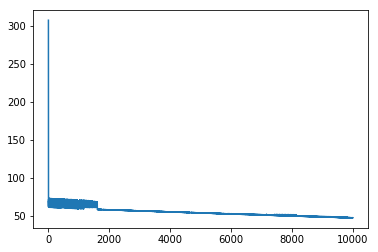

In [63]:
plt.plot(range(len(losses)), losses)
plt.show()

### Query:
Why there are some flustuate in the result? Since we calculate the derivate K and b, the value should always descend right?

# Answer questions

### 1. Why we need machine learning methods instead of creating a complicated formula?
Ans: Because sometime the formula is too complicated to create and use the machine learning is much easier.

### 2. Wha't's the disadvantages of the 1st Random Choosen methods in our course?
Ans: We can't choice the descend firection and just rely on the fortune. We can't control the result.

### 3. Is the 2nd method supervised direction better than 1st one? What's the disadvantages of the 2nd supversied directin method?
Ans: Yes, it's better than the first one, since it can contral the direction when we get a better error. However, the descend direction in 2nd method is not the best.

### 4. Why do we use Derivative / Gredient to fit a target function?
Ans: To help us get the right direction and the best descent rate. 

### 5. In the words 'Gredient Descent', what's the Gredient and what's the Descent?
Ans: Gradient is the a vector that has a function and a value. The function of the Gredient is the the function of the maximum direction derivative. The value of the Gredient is the value of the maximum direction derivative.  
The Descent means to minus the functions value along the negative gredient direction.  

### 6. What's the advantages of the 3rd gradient descent method compared to the previous methods?
Ans: IOn this method we can always get the best gredient and make sure that we are aheading the right direction and the best descent rate.

### 7. Using the simple words to describe: What's the machine leanring.
Ans: Let the computer to get the best fitting function itself based on data.